# Seizing the Means of Tenserflow ☭
   
## Lab Seven: Wide and Deep Network Architectures
   
### Justin Ledford, Luke Wood, Traian Pop

## Preparation (40 points total)
   
### [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

In [1]:
import pandas as pd
import numpy as np
import requests


# Get column names
r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/col_names.txt')

if r.status_code == 200:
    columns = r.text.replace(" ","_").replace("'","").split('\n')[:-1]
else:
    print('Error loading column names')

In [2]:
print(columns)

['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'income']

As you can see, there is a large number of attributes, with categories ranging anywhere from age to benefits. In order to ease the work on our program and receive better results, we will be crossing some of these attributes together.

In this section, we remove any attributes with missing data.

In [3]:
df_train = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz',
        compression='gzip', header=None, index_col=False)


df_test = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.test.gz',
        compression='gzip', header=None, index_col=False)


# Remove weight columns
df_train.drop(24, 1, inplace=True)
df_test.drop(24, 1, inplace=True)

df_train.columns = columns
df_test.columns = columns

# Remove rows with missing data and reset index
df_train.replace(to_replace=' ?',value=np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index()

df_test.replace(to_replace=' ?',value=np.nan, inplace=True)
df_test.dropna(inplace=True)
df_test.reset_index()

df_train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


Next, we start encoding our remaining attributes. 

In [4]:
# Process data:

# check income values consistent (only 2 values)

# replace categorical with one hot encoding
# scale continuous

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

labels = dict() 

r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/categorical.txt')
categorical_labels = r.text.replace(" ","_").replace("'","").split('\n')[:-1]

for col in categorical_labels + ['income']:
    # strip extra space in strings
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].str.strip()
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].str.strip()
        
    # convert to ints for one hot encoder to work
    
    # keep labels for reference 
    labels[col] = list(set(df_train[col].unique()) | set(df_test[col].unique()))
    
    df_train[col].replace(to_replace=labels[col],
                            value=np.arange(len(labels[col])),
                            inplace=True)
    df_test[col].replace(to_replace=labels[col],
                            value=np.arange(len(labels[col])),
                            inplace=True)

categorical_labels

['class_of_worker',
 'industry_code',
 'occupation_code',
 'education',
 'enrolled_in_edu_inst_last_wk',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'tax_filer_status',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_code-change_in_msa',
 'migration_code-change_in_reg',
 'migration_code-move_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'year']

Above are our current categorical attributes.
   
Ideas for merging:
Country of birth categories too repetitive.
Industry and occupation code unreadable.

In [5]:
r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/continuous.txt')
continuous_labels = r.text.replace(" ","_").replace("'","").split('\n')[:-1]


for col in continuous_labels:
    df_train[col] = df_train[col].astype(np.float32)
    df_test[col] = df_test[col].astype(np.float32)
    
    ss = StandardScaler()
    df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))
    
continuous_labels

['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'num_persons_worked_for_employer',
 'weeks_worked_in_year']

Above are our current continuous attributes. 
   
Ideas for merging:
Turn most of these into categorical. Ranges like the Titanic dataset he showed us.

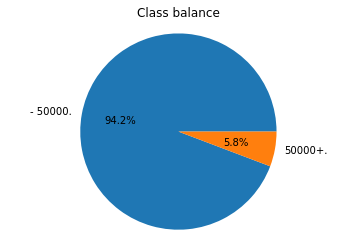

In [6]:
import matplotlib.pyplot as plt

sizes = np.bincount(df_train['income'].values)

plt.pie(sizes, labels=labels['income'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class balance')
plt.show()

In [7]:
# over sample class

df_ = df_train.copy().reset_index(drop=True)

total_size = df_.shape[0]
below50k_indices = df_[df_['income'] == 0].index
above50k_indices = df_[df_['income'] == 1].index

below50k_indices_sample = np.random.choice(below50k_indices, total_size // 2)
above50k_indices_sample = np.random.choice(above50k_indices, total_size // 2)

df_sampled = pd.concat([df_.iloc[below50k_indices_sample], df_.iloc[above50k_indices_sample]])
df_sampled = df_sampled.reset_index(drop=True)

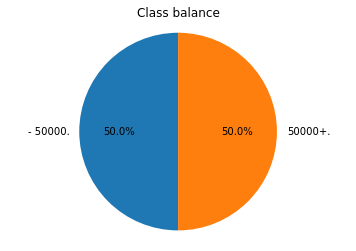

In [8]:
sizes = np.bincount(df_sampled['income'].values)

plt.pie(sizes, labels=labels['income'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class balance')
plt.show()

### [10 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

As mentioned above, we are focusing our score success on whether or not we can succesfully predict the false negatives in the >50k class. We implement this by overwriting the recall_score method with a confusion matrix.

### [10 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5)

The reason we choose Stratified Shuffle Split instead of the others is due to how large our dataset is and it is the recommended one by the source where we received our data from.
___

## Modeling (50 points total)
   
### [20 points] Create a combined wide and deep network to classify your data using tensorflow.

In [11]:
import tensorflow as tf
from tensorflow.contrib import learn
from tensorflow.contrib import layers
from tensorflow.contrib.learn.python import SKCompat
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
tf.logging.set_verbosity(tf.logging.WARN) # control the verbosity of tensor flow

### [20 points] Investigate generalization performance by altering the number of layers. Try at least two different deep network architectures. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab.

### Cross Columns

In [12]:
# https://www.tensorflow.org/tutorials/wide_and_deep
def process_input_cc(df, label_header, categ_headers, numeric_headers):
    # input: what ever you need it to be
    # output: (dict of feature columns as tensors), (labels as tensors)
    
    # ========Process Inputs=========
    # not much changes here, except we leave the numerics as tc.constants
    continuous_cols = {k: tf.reshape(tf.constant(df[k].values), [-1]) for k in numeric_headers}
      
    # and we shift these tensors to be sparse one-hot encoded values
    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    categorical_cols = {k: tf.SparseTensor(
                              indices=[[i, 0] for i in range(df[k].size)],
                              values=df[k].astype(str).values,
                              dense_shape=[df[k].size, 1])
                        for k in categ_headers}
    
    # Merges the two dictionaries into one.
    feature_cols = dict(categorical_cols)
    feature_cols.update(continuous_cols)
    
    # Convert the label column into a constant Tensor.
    label = None
    if label_header is not None:
        label = tf.constant(df[label_header].values)
        
    return feature_cols, label

In [13]:
# update the model to take input features as a dictionary
def setup_wide_deep_columns():
    # the prototype for this function is as follows
    # input:  (features, targets) 
    # output: (predictions, loss, train_op)
    
    wide_columns = []
    deep_columns = []
    # add in each of the categorical columns to both wide and deep features
    for col in categorical_labels:
        wide_columns.append(
            layers.sparse_column_with_keys(col, keys=[str(x) for x in labels[col]])
        )
        
        dim = round(np.log2(len(labels[col]))) + 1
        deep_columns.append(
            layers.embedding_column(wide_columns[-1], dimension=dim)
        )
        
    # also add in some specific crossed columns
    cross_columns = [('education','occupation_code'),('country_of_birth_father', 'country_of_birth_mother')]
    for tup in cross_columns:
        wide_columns.append(
            layers.crossed_column(
                [layers.sparse_column_with_keys(tup[0], keys=[str(x) for x in labels[tup[0]]]),
                 layers.sparse_column_with_keys(tup[1], keys=[str(x) for x in labels[tup[1]]])],
            hash_bucket_size=int(1e4))
        )
        
        
    # and add in the regular dense features 
    for col in continuous_labels:
        deep_columns.append(
            layers.real_valued_column(col)
        )
                    
    return wide_columns, deep_columns

In [14]:
%%time

from sklearn.neural_network import MLPClassifier
from numpy import interp

tf.logging.set_verbosity(tf.logging.ERROR)

df = df_sampled.sample(frac=0.01)
#df = df_train.sample(frac=0.01)
#df = df_sampled.copy()

X = df.drop('income', axis=1).values
y = df['income'].values

wide_columns, deep_columns = setup_wide_deep_columns()

for col in deep_columns:
    if col.dimension == 0.0:
        print(col)

        
mlp_roc_auc = []
dnn_roc_auc = []

mean_tpr_mlp = 0.0
mean_fpr_mlp = np.linspace(0, 1, 100)
mean_tpr_dnn = 0.0
mean_fpr_dnn = np.linspace(0, 1, 100)

n_splits = 5

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.5)

for train_index, test_index in sss.split(X, y):
    dnn = learn.DNNLinearCombinedClassifier(
                            linear_feature_columns=wide_columns,
                            dnn_feature_columns=deep_columns,
                            dnn_hidden_units=[100, 50, 25, 5])
    
    mlp = MLPClassifier()
    
    X_train = df.drop('income', axis=1).iloc[train_index]
    y_train = df['income'].iloc[train_index]

    X_test = df.drop('income', axis=1).iloc[test_index]
    y_test = df['income'].iloc[test_index]
 
    input_wrapper = lambda:process_input_cc(df.iloc[train_index],'income',categorical_labels, continuous_labels)
    output_wrapper = lambda:process_input_cc(df.iloc[test_index],None,categorical_labels, continuous_labels)

    # when we provide the process function, they expect us to control the mini-batch
    dnn.fit(input_fn=input_wrapper, steps=500)
    mlp.fit(X_train, y_train)

    yhat_dnn = list(dnn.predict(input_fn=output_wrapper))
    yhat_mlp = mlp.predict(X_test)

    print('DNN')
    print(confusion_matrix(y_test,yhat_dnn),
          recall_score(y_test,yhat_dnn))
    
    print('MLP')
    print(confusion_matrix(y_test,yhat_mlp),
          recall_score(y_test,yhat_mlp))
    
    probs_dnn = list(dnn.predict_proba(input_fn=output_wrapper))
    probs_dnn = np.array(probs_dnn)[:,1]
    fpr_dnn, tpr_dnn, _ = roc_curve(y_test, probs_dnn)
    dnn_roc_auc.append((fpr_dnn, tpr_dnn, auc(fpr_dnn, tpr_dnn)))
    mean_tpr_dnn += interp(mean_fpr_dnn, fpr_dnn, tpr_dnn)
    mean_tpr_dnn[0] = 0.0   
    
    probs_mlp = mlp.predict_proba(X_test)
    probs_mlp = np.array(probs_mlp)[:,1]
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, probs_mlp)
    mlp_roc_auc.append((fpr_mlp, tpr_mlp, auc(fpr_mlp, tpr_mlp)))
    mean_tpr_mlp  += interp(mean_fpr_mlp, fpr_mlp, tpr_mlp)
    mean_tpr_mlp [0] = 0.0
    


DNN
[[227  29]
 [ 46 174]] 0.790909090909
MLP
[[218  38]
 [ 30 190]] 0.863636363636
DNN
[[228  28]
 [ 43 177]] 0.804545454545
MLP
[[226  30]
 [ 39 181]] 0.822727272727
DNN
[[210  46]
 [ 30 190]] 0.863636363636
MLP
[[226  30]
 [ 53 167]] 0.759090909091
DNN
[[219  37]
 [ 43 177]] 0.804545454545
MLP
[[232  24]
 [ 56 164]] 0.745454545455
DNN
[[205  51]
 [ 17 203]] 0.922727272727
MLP
[[216  40]
 [ 30 190]] 0.863636363636
CPU times: user 3min 3s, sys: 2.89 s, total: 3min 6s
Wall time: 2min 33s


In [15]:
mean_tpr_mlp /= n_splits
mean_tpr_mlp[-1] = 1.0
mean_auc_mlp = auc(mean_fpr_mlp, mean_tpr_mlp)

mean_tpr_dnn /= n_splits
mean_tpr_dnn[-1] = 1.0
mean_auc_dnn = auc(mean_fpr_dnn, mean_tpr_dnn)



### 10 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve.

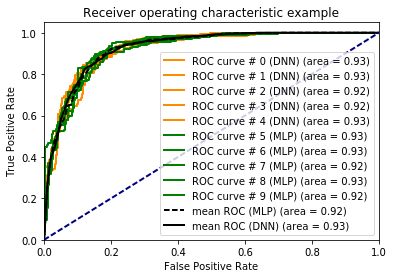

In [16]:
plt.figure()
lw = 2
i = 0
for fpr, tpr, auc_ in dnn_roc_auc:
        plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve # %d (DNN) (area = %0.2f)' % (i, auc_))
        i += 1
for fpr, tpr, auc_ in mlp_roc_auc:
        plt.plot(fpr, tpr, color='green',
             lw=lw, label='ROC curve # %d (MLP) (area = %0.2f)' % (i, auc_))
        i += 1        
        
# TODO: fix means
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'k--', label='mean ROC (MLP) (area = %0.2f)' % mean_auc_mlp, lw=2)
plt.plot(mean_fpr_dnn, mean_tpr_dnn, 'k-', label='mean ROC (DNN) (area = %0.2f)' % mean_auc_dnn, lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Preparation (40 points total)
   
### [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

___

## Exceptional Work (10 points total)
   
### One idea: Investigate which cross-product features are most important and hypothesize why.
___